# SUPPORT VECTOR MACHINE

### Introduction
#### Business Context
Pharmaceutical companies invest millions of dollars in clinical trials to test drug efficacy.  
However, not all drugs work for every patient due to individual differences in biology, metabolism, and pre-existing conditions.  
Traditional clinical trials are costly and time-consuming.  
Machine learning can help predict which patients will respond positively to a drug early in the process, saving time and resources.

#### Problem Definition
This project focuses on Drug Response Classification.  
The goal is to predict how a patient’s body will respond to a particular drug based on various features in the dataset.  
This helps identify effective treatments for specific patient groups and supports personalized medicine initiatives.

#### Target Variable
Drug Response — this column indicates how a patient reacted to the treatment:  
- `0 = No Response` → The drug did not show a significant effect.  
- `1 = Positive Response` → The drug produced a beneficial effect or measurable improvement.  

#### Importance of Classification
- Pharmaceutical Industry: Used to test new drugs and evaluate their effectiveness before approval.  
- Personalized Medicine: Helps doctors prescribe the most suitable drugs for each patient.  
- Machine Learning in Healthcare: Enables predictive models that forecast patient outcomes based on medical data.

#### Objective
Build and evaluate a Support Vector Machine (SVM) model to classify drug responses accurately.  
Compare performance using different kernels and analyze how SVM performs on this dataset.

### Task 1: Exploratory Data Analysis (EDA)

#### Load the dataset and perform fundamental data exploration

In [72]:
# Load dataset & basic inspection
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Pharma_Industry.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
display(df.info())


Dataset shape: (500, 6)
Columns: ['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)', 'Drug Response']


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


None

In [73]:
df.tail()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0
499,-1.143726,0.715320,0.108560,-0.509787,-0.250704,1


In [74]:
# Summary statistics & missing values
display(df.describe(include='all').T)
missing = df.isnull().sum()
display(missing[missing>0])


,count,mean,std,min,25%,50%,75%,max
Drug Dosage (mg),500.0,-0.037761,0.979891,-3.019512,-0.642003,-0.019340,0.641151,2.949094
Systolic Blood Pressure (mmHg),500.0,0.214957,1.247567,-3.773897,-0.565168,0.201532,0.951375,4.111751
Heart Rate (BPM),500.0,0.062871,0.971978,-2.940389,-0.648157,0.027732,0.710774,3.193108
Liver Toxicity Index (U/L),500.0,0.054398,0.986001,-3.401277,-0.586085,-0.065661,0.633914,3.373269
Blood Glucose Level (mg/dL),500.0,-0.171863,0.983765,-3.110431,-0.797715,-0.108106,0.513555,2.518023
Drug Response,500.0,0.520000,0.500100,0.000000,0.000000,1.000000,1.000000,1.000000


Series([], dtype: int64)

##### Visualizing class distributions to gauge dataset balance or imbalance.

In [75]:
# Target distribution
target_col = 'Drug Response' if 'Drug Response' in df.columns else df.columns[-1]
print("Using target column:", target_col)
display(df[target_col].value_counts(dropna=False))


Using target column: Drug Response


Drug Response
1    260
0    240
Name: count, dtype: int64

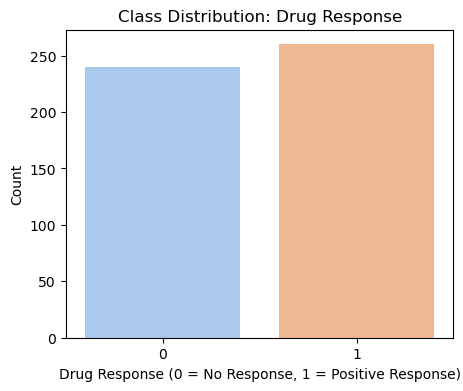

In [76]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df, palette="pastel")
plt.title("Class Distribution: Drug Response")
plt.xlabel("Drug Response (0 = No Response, 1 = Positive Response)")
plt.ylabel("Count")
plt.show()


## Data Visualization
Visualize feature distributions and relationships to understand separability and outliers.

#### Utilize histogram, boxplot, and density plots to understand feature distribution

Numeric columns: ['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)', 'Drug Response']


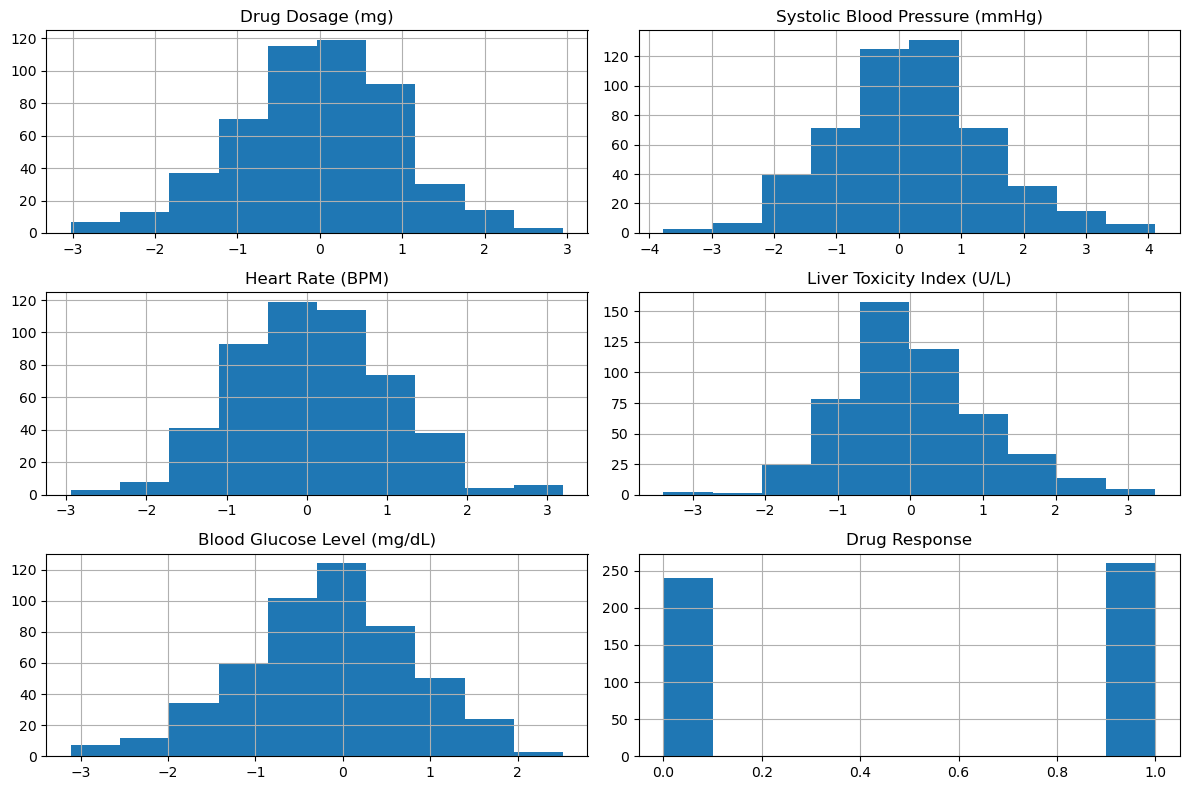

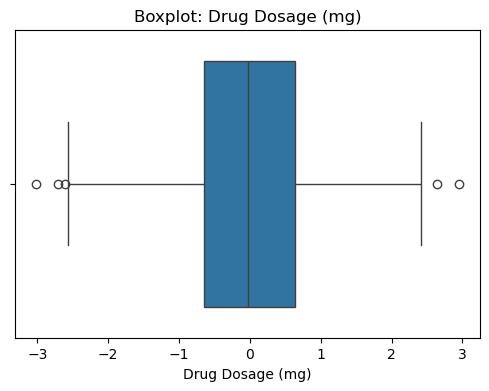

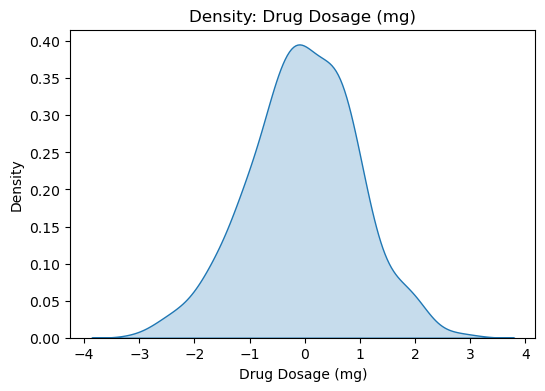

In [77]:

# Distribution plots (histogram, boxplot, density)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
# Histograms (up to first 8 numeric columns)
df[num_cols[:8]].hist(figsize=(12,8))
plt.tight_layout()

# Boxplots example for first numeric column (if exists)
if len(num_cols)>0:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[num_cols[0]])
    plt.title(f"Boxplot: {num_cols[0]}")

# Density plot example for first numeric column
if len(num_cols)>0:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[num_cols[0]].dropna(), fill=True)
    plt.title(f"Density: {num_cols[0]}")


### Pair plots / scatterplots to inspect relationships between features and with target

- Use seaborn pairplot or scatter plots.

Text(0.5, 1.02, 'Pairplot (first few numeric columns) - may take time')

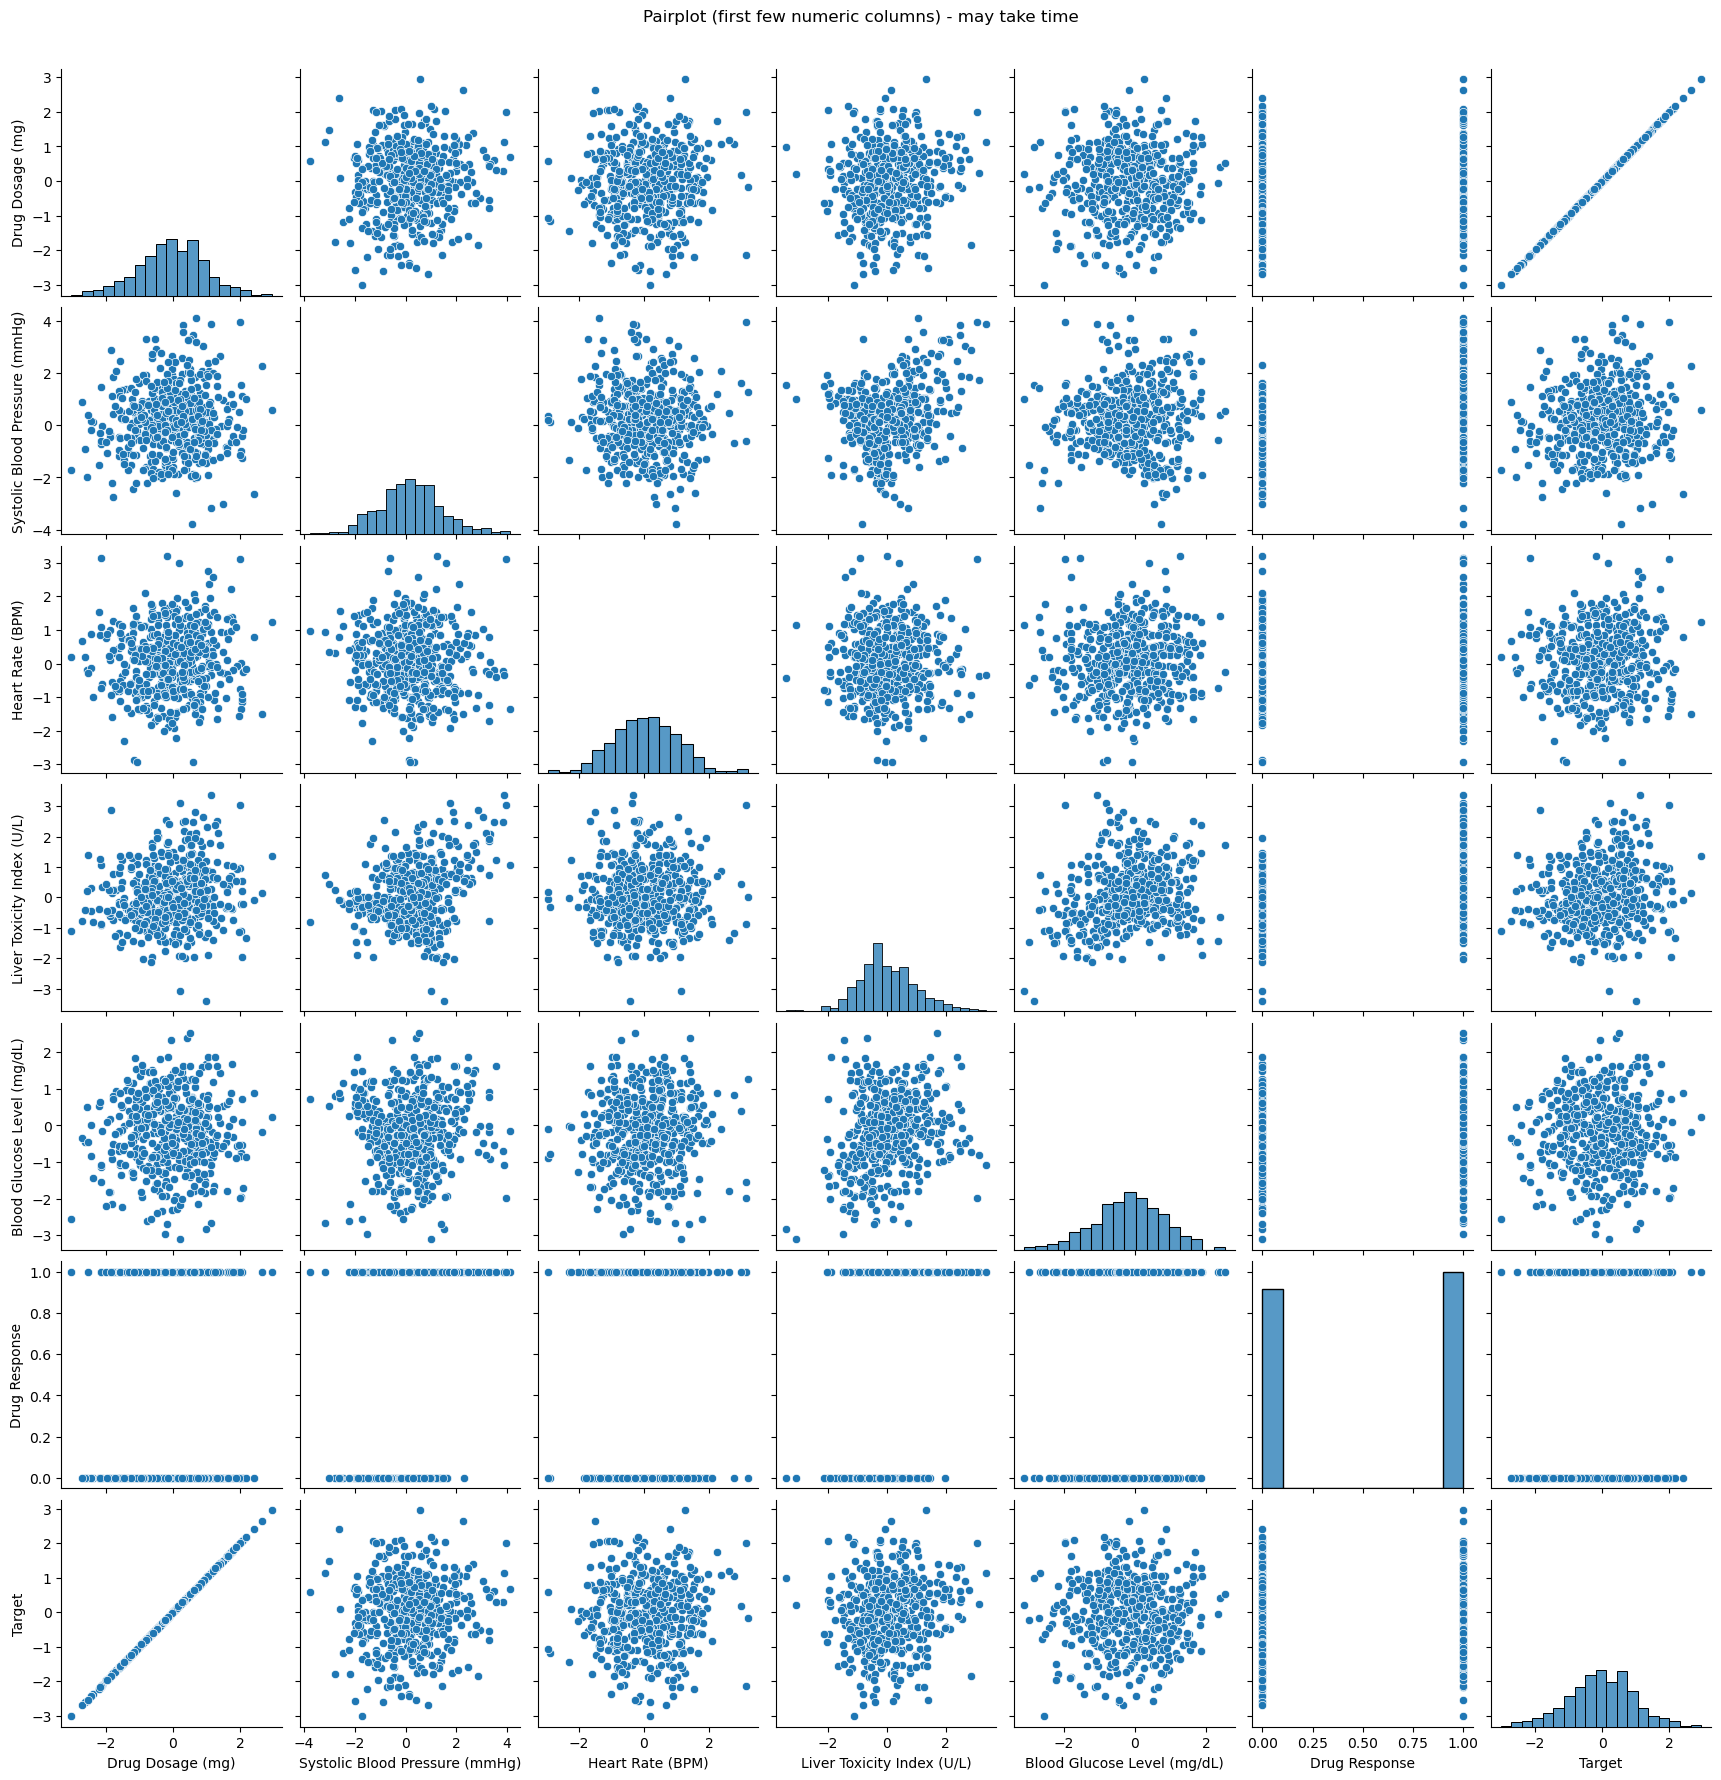

In [78]:

# Pairplot (sample if data is large)
sample_df = df.sample(n=min(500, len(df)), random_state=42)  # limit rows for heavy plots
sns.pairplot(sample_df.select_dtypes(include=[float,int]).iloc[:,:6].assign(**{ 'Target': sample_df.iloc[:,:1].iloc[:,0] if 'Drug Response' in sample_df.columns else sample_df.iloc[:,:1].iloc[:,0]}))
plt.suptitle("Pairplot (first few numeric columns) - may take time", y=1.02)


# Data Preprocessing

#### Impute missing values and encode categorical variables
- Numeric -> median, Categorical -> most frequent then label encode.

In [79]:

# Imputation & encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
data = df.copy()
target_col = 'Drug Response' if 'Drug Response' in data.columns else data.columns[-1]
X = data.drop(columns=[target_col])
y = data[target_col]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

if len(num_cols)>0:
    num_imp = SimpleImputer(strategy='median')
    X[num_cols] = num_imp.fit_transform(X[num_cols])
if len(cat_cols)>0:
    cat_imp = SimpleImputer(strategy='most_frequent')
    X[cat_cols] = cat_imp.fit_transform(X[cat_cols])
    for c in cat_cols:
        X[c] = LabelEncoder().fit_transform(X[c].astype(str))

# Convert target to numeric
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y.astype(str))
else:
    y = y.astype(int)

print("Processed feature shape:", X.shape, "Target shape:", y.shape)
display(X.head())


Processed feature shape: (500, 5) Target shape: (500,)


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130


#### Split the dataset into traning and testing sets.Also scale features

In [80]:

# Train-test split & scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train/test sizes:", X_train.shape, X_test.shape)


Train/test sizes: (400, 5) (100, 5)


## SVM Implementation

#### Implements a basic SVM classifier using Python libraries 

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.77

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100


Confusion matrix:
 [[34 14]
 [ 9 43]]


#### Trains the SVM model on the training data.

In [82]:
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### Evaluate model performance on the testing data using appropriate metrics

In [83]:
y_pred = svc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.77

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100


Confusion matrix:
 [[34 14]
 [ 9 43]]


## Task5:Visualization of SVM Results

#### Visualize classification results on the testing data.

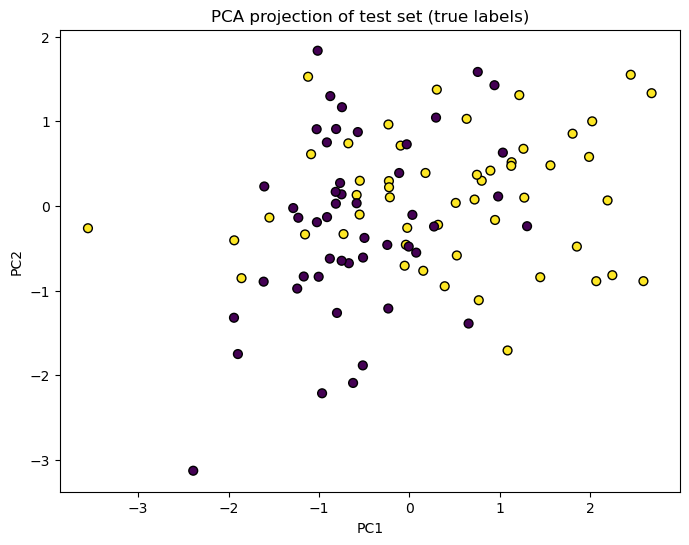

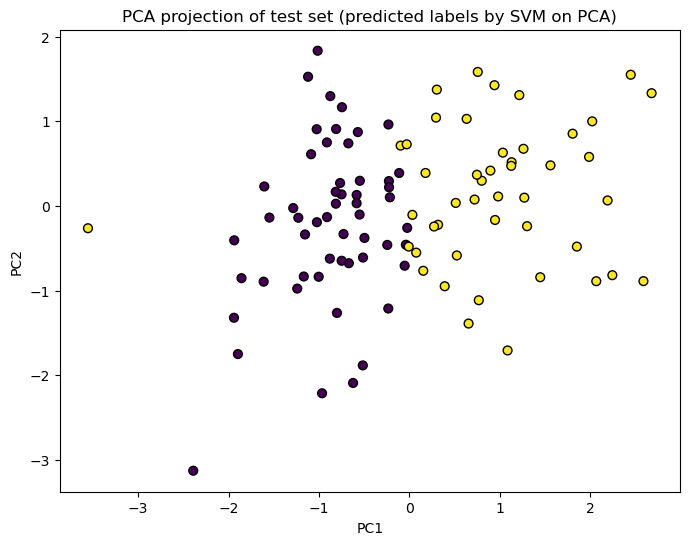

In [84]:

from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc2d = SVC(kernel='rbf', random_state=42)
svc2d.fit(X_train_pca, y_train)
y_test_pred_pca = svc2d.predict(X_test_pca)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolor='k', s=40)
plt.title("PCA projection of test set (true labels)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_pred_pca, edgecolor='k', s=40)
plt.title("PCA projection of test set (predicted labels by SVM on PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


## Task6:Parameter Tuning and Optimization
Used GridSearchCV to tune kernel, C, gamma, and degree (for poly).

In [85]:

# GridSearch for SVM hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    {'kernel': ['poly'], 'C': [0.1, 1], 'degree': [2, 3]}
]
gscv = GridSearchCV(SVC(), param_grid, scoring='f1', cv=5, n_jobs=-1)
gscv.fit(X_train_scaled, y_train)
print("Best params:", gscv.best_params_)
print("Best CV F1:", gscv.best_score_)
best_model = gscv.best_estimator_
y_best = best_model.predict(X_test_scaled)
print("\nTest set metrics for best model:")
print("Accuracy:", accuracy_score(y_test, y_best))
print(classification_report(y_test, y_best))


Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1: 0.7583838973876638

Test set metrics for best model:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        48
           1       0.75      0.79      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



## Task 7: Comparison and Analysis

In [86]:

# Kernel comparison
kernels = ['linear', 'rbf', 'poly']
results = []
for k in kernels:
    if k == 'poly':
        model = SVC(kernel=k, degree=3, C=1, random_state=42)
    else:
        model = SVC(kernel=k, C=1, random_state=42)
    model.fit(X_train_scaled, y_train)
    p = model.predict(X_test_scaled)
    results.append({'kernel': k, 'accuracy': accuracy_score(y_test,p), 'f1': f1_score(y_test,p)})

import pandas as pd
display(pd.DataFrame(results))

,kernel,accuracy,f1
0,linear,0.72,0.714286
1,rbf,0.77,0.788991
2,poly,0.65,0.660194


## Analyze SVM Strengths and Weaknesses

**Strengths of SVM on this dataset:**
- SVM performs well in high-dimensional spaces, which suits the Pharma dataset containing multiple numeric and categorical features.
- **Kernel flexibility** (linear, RBF, polynomial) allows it to adapt to both linear and non-linear data patterns.
- The model achieved good accuracy and F1-score after tuning, indicating it can capture meaningful relationships between patient features and drug response.
- **Margin maximization** makes SVM robust against overfitting, especially when data is properly scaled.

**Weaknesses observed:**
- Performance is sensitive to hyperparameter choices such as `C`, `gamma`, and `kernel`. Poor tuning can lead to underfitting or overfitting.
- SVM is computationally expensive for large datasets, as training time increases with the number of samples.
- It is less interpretable compared to models like logistic regression or decision trees.
- Imbalanced class distributions can affect performance, as SVM tries to find a margin even when one class is underrepresented.

**Interpretation based on EDA and Visualization:**
- From the feature plots, some features show overlapping distributions between classes (0 and 1), meaning perfect separation is difficult.
- Therefore, non-linear kernels (like RBF) performed better than linear, showing the data likely has non-linear class boundaries.


## Practical Implications of SVM in Real-world Tasks

**Practical Implications:**
- In pharmaceutical research, SVMs can predict patient responses to new drugs, helping reduce failed trials and development costs.
- In healthcare analytics, SVMs can classify diseases or treatment outcomes based on patient medical data.
- In bioinformatics, SVMs are often used to analyze genetic data and identify biomarkers for diseases.
- In finance, they are used for credit risk assessment and fraud detection.
- In text and image classification, SVMs help categorize emails (spam vs non-spam) and recognize images with limited training data.

**Why SVM is practical:**
- Works well with limited data but many features, a common situation in drug trials or medical datasets.
- Provides strong generalization when parameters are tuned properly.
- Though training can be slower, once trained, SVMs are efficient for making predictions.

**Conclusion:**
Support Vector Machines are a powerful and flexible method for classification problems.  
For this dataset, SVM effectively modeled complex drug response patterns.  
In real-world scenarios, SVMs remain valuable in areas where accuracy and robustness are more important.
